In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

1. Import the data set into pandas data frame.
This data set provides information on the fate of passengers on the fatal maiden voyage
of the ocean liner ”Titanic”, summarized according to survival (target variable with
1=survived and 0=died) and explanatory variables: Name, Pclass (passenger class),
Sex, Age, SibSp (total number of siblings including the spouse traveling with the
passenger), Parch (total number of parents and children traveling with the passenger),
Ticket, Fare, Cabin, and Embarked (where the traveler mounted from – Southampton,
Cherbourg, or Queenstown).
The goal of this assignment is to build a classification tree and use some of the explanatory variables to predict whether a passenger survived or not.

In [2]:
read_data = pd.read_csv('titanic_train.csv', index_col = False)
data_set = pd.DataFrame(read_data)

print(data_set.shape)

(891, 12)


In [3]:
print(data_set.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(data_set['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [5]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


2. Select one or more explanatory variables you would like to use. For example, you might
consider ”Pclass”, ”Sex”, ”Age”, and ”Fare”.

In [6]:
correct_label = data_set['Survived'].values
feature_vectors = data_set.drop(['Name', 'Parch', 'Ticket','Cabin', 'PassengerId','Survived',
                                'Embarked', 'SibSp'], axis = 1)

In [7]:
feature_vectors.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [8]:
# We can see above that Age is missing values and Sex needs to be encoded
print(feature_vectors.describe())

           Pclass         Age        Fare
count  891.000000  714.000000  891.000000
mean     2.308642   29.699118   32.204208
std      0.836071   14.526497   49.693429
min      1.000000    0.420000    0.000000
25%      2.000000   20.125000    7.910400
50%      3.000000   28.000000   14.454200
75%      3.000000   38.000000   31.000000
max      3.000000   80.000000  512.329200


3. Figure out if there are any missing values in the explanatory variables you want to
use and either delete those passengers from the data set or fill in the missing values.
If a numerical variable has missing values, you might fill those in with the average or
median of that variable. If a categorical variable has missing values, you might fill
those in using the most common value.

4. Convert the categorical variables to numerical using encoding.


In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", 
         SimpleImputer(missing_values=np.nan, strategy="mean")),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        ("ordinal", OrdinalEncoder()),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, ['Sex']),
        ("numerical", numeric_preprocessor, ['Pclass','Age','Fare']),
    ]
)

In [10]:
pipe = make_pipeline(preprocessor)

In [11]:
features_pipe = pipe.fit_transform(feature_vectors)
np.info(features_pipe)

class:  ndarray
shape:  (891, 4)
strides:  (8, 7128)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x1fbab3b81a0
byteorder:  little
byteswap:  False
type: float64


In [12]:
print(features_pipe)

[[ 1.          3.         22.          7.25      ]
 [ 0.          1.         38.         71.2833    ]
 [ 0.          3.         26.          7.925     ]
 ...
 [ 0.          3.         29.69911765 23.45      ]
 [ 1.          1.         26.         30.        ]
 [ 1.          3.         32.          7.75      ]]


5. Split the data into training and testing sets.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(features_pipe, correct_label, test_size=0.3, random_state=42)

6. Build a classification tree on the training data.


In [14]:
tree_model = tree.DecisionTreeClassifier()
model = tree_model.fit(X_train, y_train)

7. Inspect the evaluation measures (accuracy score, confusion matrix, classification report).

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print('Train Accuracy:', model.score(X_train, y_train))
print ('Test Accuracy:', accuracy_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Train Accuracy: 0.9791332263242376
Test Accuracy: 0.7611940298507462

 clasification report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       157
           1       0.73      0.68      0.70       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

[[129  28]
 [ 36  75]]


8. Modify the tree parameters (such as criterion, max depth, min samples split, and
min samples leaf) of your model to increase the accuracy score. You might want to
plot a graph showing accuracy score for different values of these parameters and pick
the best parameters.

In [16]:
from sklearn.model_selection import GridSearchCV
param_dict = {
    "criterion": ['gini','entropy'],
    "max_depth": range(1, 15),
    "min_samples_split": range(2, 25),
    "min_samples_leaf": range(1, 35),
    "max_features": ['auto', 'sqrt', 'log2']
}

In [17]:
clf = GridSearchCV(tree_model,
            param_grid = param_dict,
            cv = 5,
            verbose = 0,
            n_jobs = -1)

In [18]:
grid_model = clf.fit(X_train, y_train)

In [19]:
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=14, min_samples_split=11)

In [20]:
y_pred_grid = grid_model.predict(X_test)

In [21]:
print('Train Accuracy:', grid_model.score(X_train, y_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred_grid))
print('\n clasification report:\n', classification_report(y_test, y_pred_grid))
print(confusion_matrix(y_test, y_pred_grid))

Train Accuracy: 0.8282504012841091
Test Accuracy: 0.8059701492537313

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.82      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268

[[140  17]
 [ 35  76]]


In [22]:
grid_df = pd.DataFrame(grid_model.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000399,0.000488,0.000599,0.000489,gini,1,auto,1,2,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.656,0.880,0.600,0.782258,0.685484,0.720748,0.099157,62608
1,0.000599,0.000489,0.000399,0.000489,gini,1,auto,1,3,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.656,0.880,0.712,0.782258,0.814516,0.768955,0.078213,46349
2,0.000798,0.000399,0.000399,0.000489,gini,1,auto,1,4,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.736,0.880,0.712,0.604839,0.685484,0.723665,0.089785,62309
3,0.000399,0.000489,0.000399,0.000489,gini,1,auto,1,5,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.656,0.880,0.712,0.604839,0.685484,0.707665,0.093223,63626
4,0.000798,0.000399,0.000199,0.000399,gini,1,auto,1,6,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.624,0.672,0.712,0.782258,0.685484,0.695148,0.052083,64327


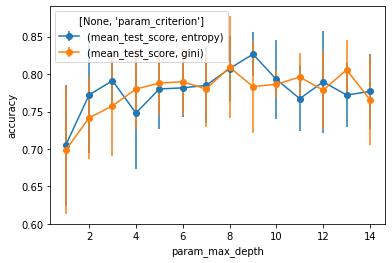

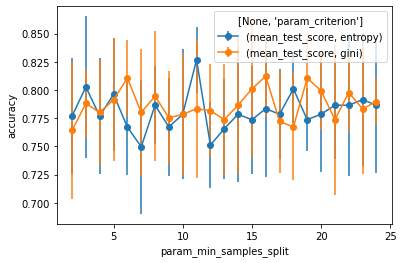

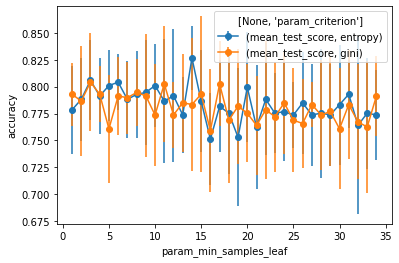

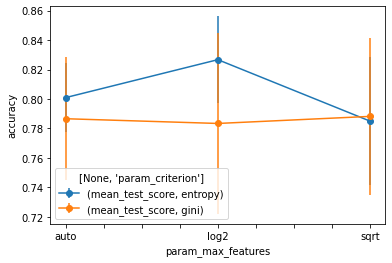

In [23]:
def plot_results(index='place_holder', columns='param_criterion'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    df = pd.DataFrame(grid_model.cv_results_)

    # Remove the other by selecting their best values (from grid_model.best_params_)
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
        df = df[df[col] == grid_model.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    
    plt.ylabel('accuracy')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='max_depth', columns='criterion')
plot_results(index='min_samples_split', columns='criterion')
plot_results(index='min_samples_leaf', columns='criterion')
plot_results(index='max_features', columns='criterion')

9. Plot the final classification tree.


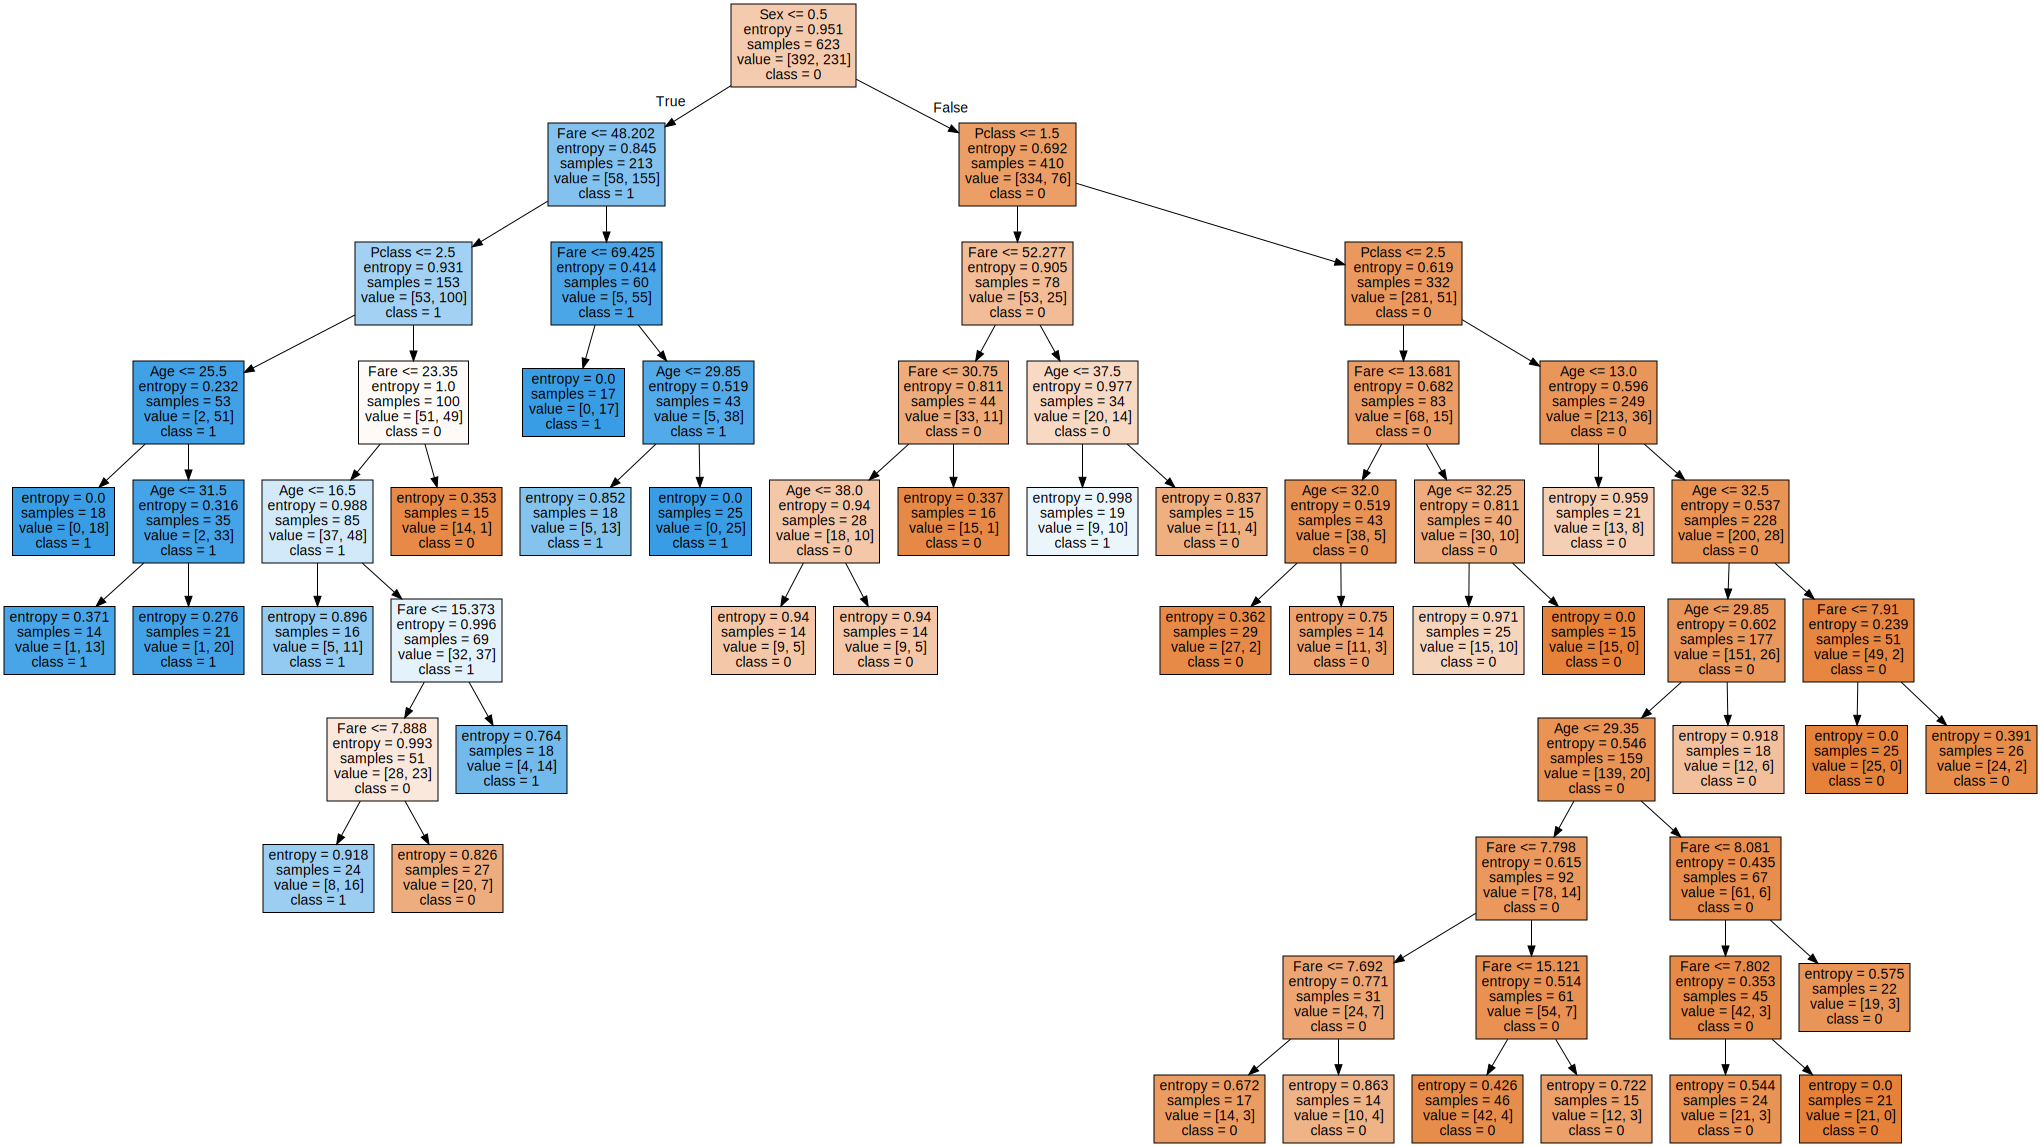

In [26]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(grid_model.best_estimator_, out_file=None, 
                                feature_names=['Sex','Pclass','Age','Fare' ],  
                                class_names=['0', '1'],
                                filled=True)

graph.format = "png"
graph.render("Tuck_DT_Chart")

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

10. Take some values for the explanatory variables and use your model to predict if that
person would have survived or not.


In [25]:
for i in range(1,10):    
    print(f"predicted label = {(y_pred_grid[i])}")
    print(f"actual label = {y_test[i]}")

predicted label = 0
actual label = 0
predicted label = 0
actual label = 0
predicted label = 1
actual label = 1
predicted label = 1
actual label = 1
predicted label = 1
actual label = 1
predicted label = 1
actual label = 1
predicted label = 0
actual label = 0
predicted label = 1
actual label = 1
predicted label = 1
actual label = 1
